##### ARTI 560 - Computer Vision  
## Image Classification using Convolutional Neural Networks (CNNs) - Exercise 

### Objective

In this exercise, you will:

1. **Load the Fashion MNIST dataset** from the [Keras dataset](https://keras.io/api/datasets/) website.
2. **Preprocess the data** for training.
3. **Build your own CNN architecture** and evaluate the model.

In [22]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np

# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

# Number of unique classes
print(f"Number of unique classes: {len(np.unique(y_train))}")

Number of unique classes: 10


In [23]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

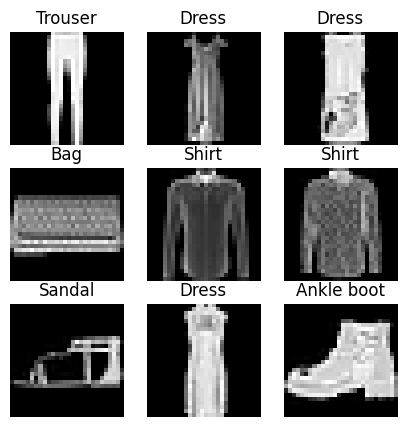

In [24]:
# Plot a 3x3 grid of random images from the dataset with their labels
plt.figure(figsize=(5, 5))
for i in range(9):
    index = np.random.randint(0, len(x_train))
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[index], cmap='gray') 
    plt.title(class_names[y_train[index]]) 
    plt.axis("off")
plt.show()

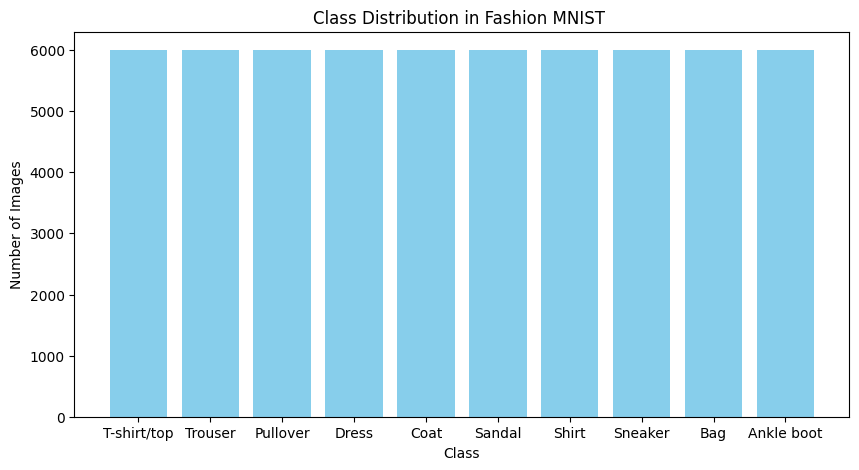

In [25]:
# Count occurrences of each class in the training set
class_counts = np.bincount(y_train)

# Plot the class distribution
plt.figure(figsize=(10, 5))
plt.bar(class_names, class_counts, color='skyblue')
plt.title("Class Distribution in Fashion MNIST ")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

### Build your Image Classification Model
Note: Don't use one hot encoding and use sparse_categorical_crossentropy for loss

In [26]:
# Import libraries
from tensorflow.keras import layers, models
# Normalize pixel values for x_train and x_test
x_train, x_test = x_train / 255.0, x_test / 255.0
# One-hot encode the labels

# Build a CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64,validation_data=(x_test, y_test))
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.8186 - loss: 0.4993 - val_accuracy: 0.8616 - val_loss: 0.3862
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8806 - loss: 0.3288 - val_accuracy: 0.8794 - val_loss: 0.3295
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8987 - loss: 0.2776 - val_accuracy: 0.8940 - val_loss: 0.2932
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9092 - loss: 0.2502 - val_accuracy: 0.9008 - val_loss: 0.2757
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9178 - loss: 0.2222 - val_accuracy: 0.9036 - val_loss: 0.2620
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9271 - loss: 0.1991 - val_accuracy: 0.9114 - val_loss: 0.2422
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9337 - loss: 0.1785 - val_accuracy: 0.9140 - val_loss: 0.2438
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9401 - loss: 0.1639 - 